Saving synthetic_code_optimization.csv to synthetic_code_optimization.csv

--- Training model 1/20 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



--- Training model 2/20 ---

--- Training model 3/20 ---

--- Training model 4/20 ---

--- Training model 5/20 ---

--- Training model 6/20 ---

--- Training model 7/20 ---

--- Training model 8/20 ---

--- Training model 9/20 ---

--- Training model 10/20 ---

--- Training model 11/20 ---

--- Training model 12/20 ---

--- Training model 13/20 ---

--- Training model 14/20 ---

--- Training model 15/20 ---

--- Training model 16/20 ---

--- Training model 17/20 ---

--- Training model 18/20 ---

--- Training model 19/20 ---

--- Training model 20/20 ---


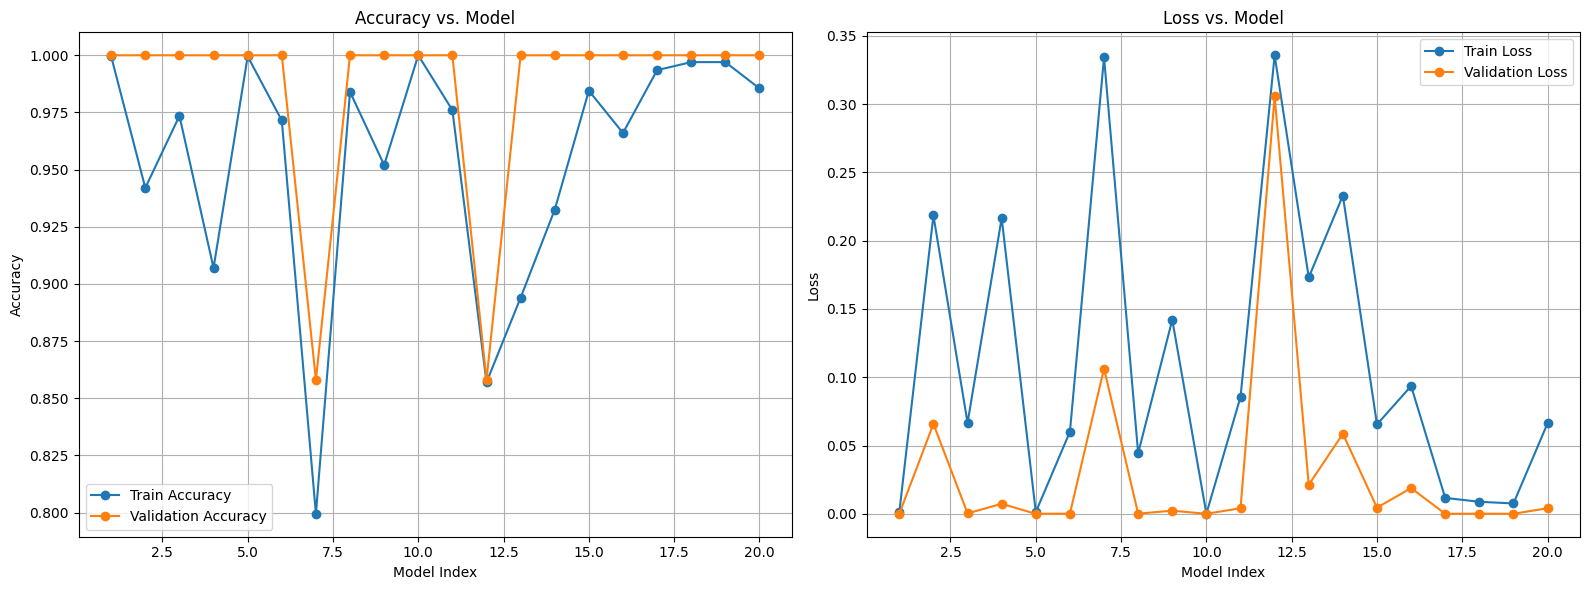

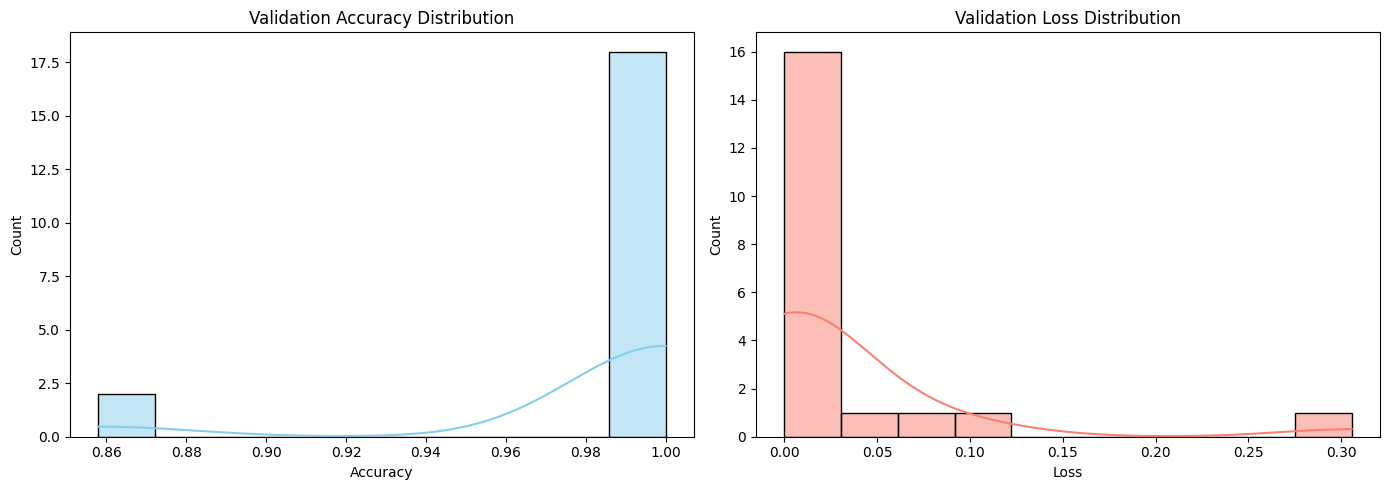

<ipython-input-1-74346c07a8cf>:139: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="activation_1", data=results_df, palette="viridis")


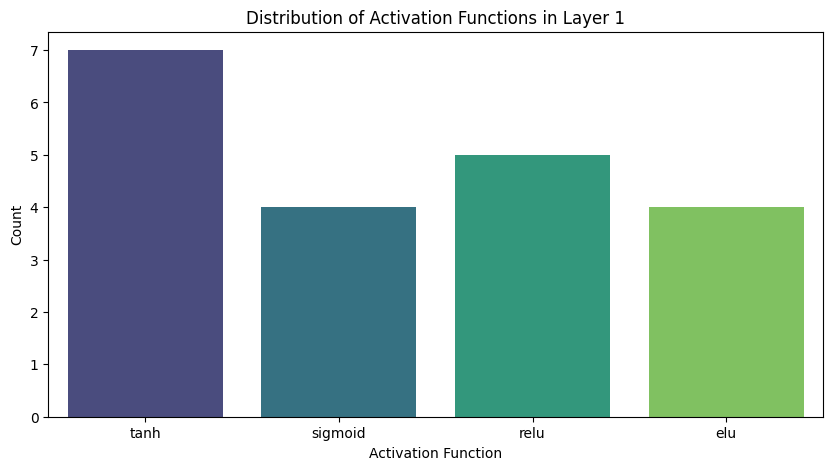

<ipython-input-1-74346c07a8cf>:147: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="activation_1", y="val_acc", data=results_df, palette="coolwarm")


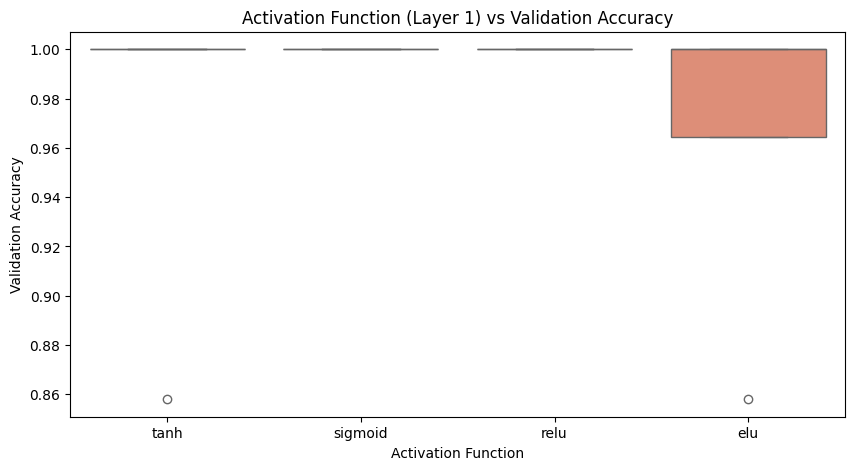

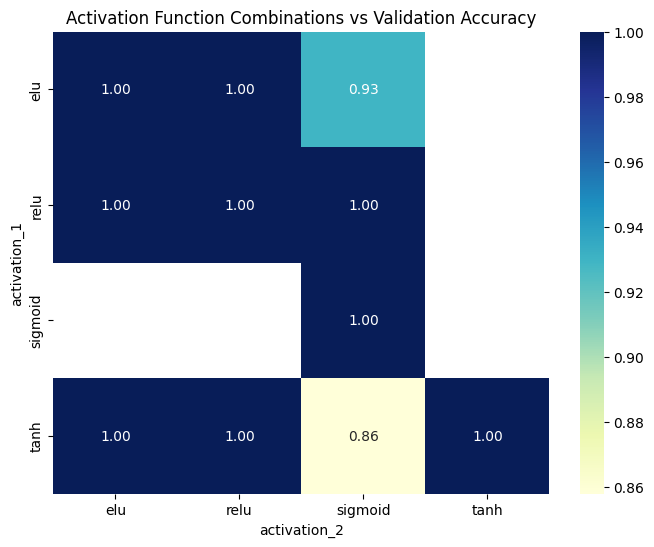


🏆 Best Hyperparameters:
model                  1
neurons_1             16
neurons_2             16
dropout_1           0.48
dropout_2           0.33
learning_rate    0.00114
batch_size            32
epochs               200
activation_1        tanh
activation_2        tanh
train_acc         0.9995
val_acc              1.0
train_loss       0.00113
val_loss             0.0
Name: 0, dtype: object


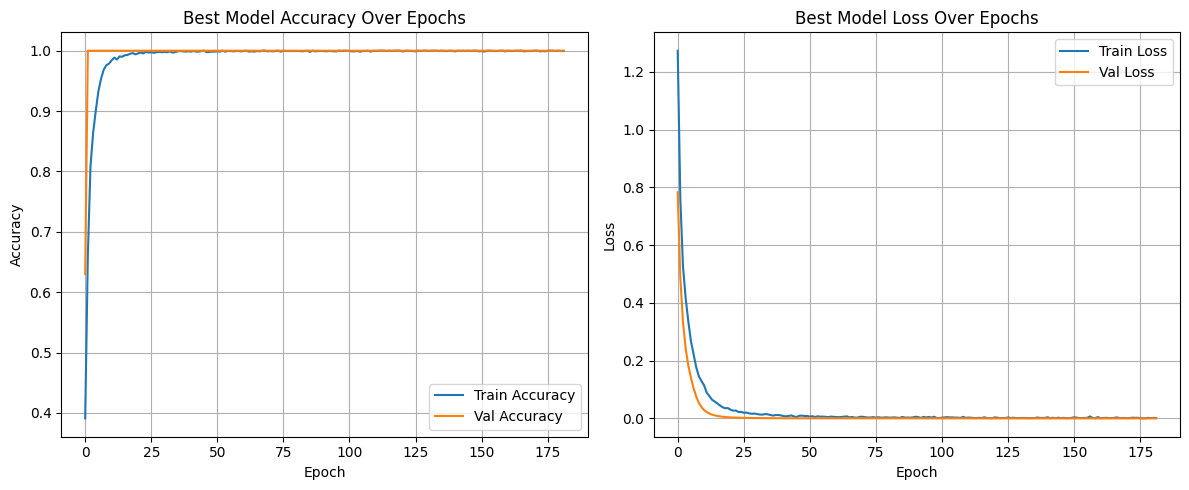

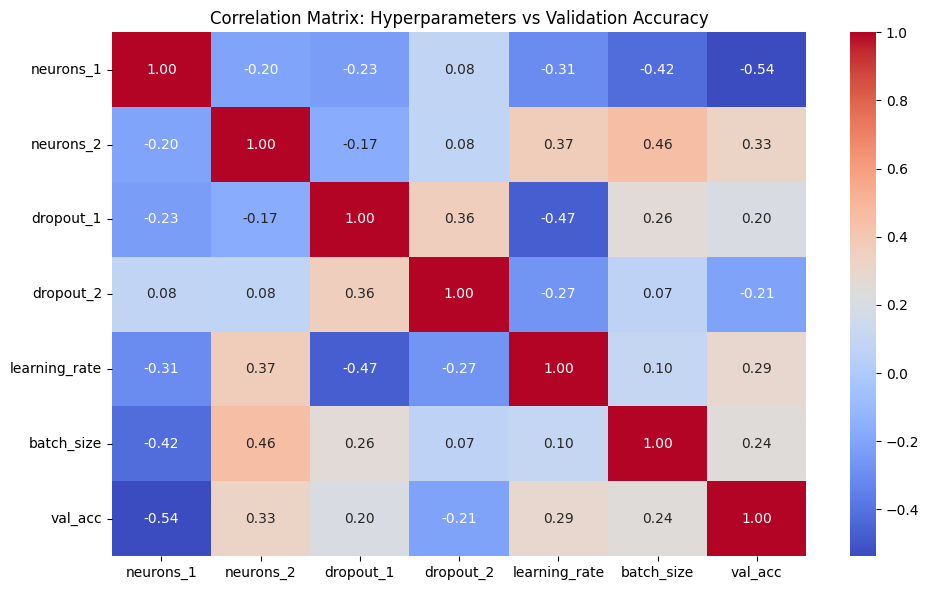

In [ ]:
# STEP 1: Install & import required libraries
!pip install seaborn --quiet

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import re
import random
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 2: Upload your file
from google.colab import files
uploaded = files.upload()

# STEP 3: Load the uploaded CSV
df = pd.read_csv("synthetic_code_optimization.csv")

# STEP 4: Feature extraction
def extract_features(code_snippet):
    loop_count = len(re.findall(r'\b(for|while)\b', code_snippet))
    branch_count = len(re.findall(r'\b(if|else if|else|switch|case)\b', code_snippet))
    memory_access_count = len(re.findall(r'\b(malloc|free|new|delete)\b', code_snippet))
    return [loop_count, branch_count, memory_access_count]

X = np.array([extract_features(code) for code in df["Code Snippet"]])

# STEP 5: Label encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["Optimization Level"])

# STEP 6: Train-test split and scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# STEP 7: Model training with anti-overfitting strategies
activation_functions = ['relu', 'tanh', 'sigmoid', 'elu']
results = []
histories = []

# Add Gaussian noise to training data
noise_factor = 0.05
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)

for i in range(20):
    print(f"\n--- Training model {i+1}/20 ---")

    hp = {
        "neurons_1": random.choice([8, 16, 32]),
        "neurons_2": random.choice([4, 8, 16]),
        "dropout_1": round(random.uniform(0.3, 0.5), 2),
        "dropout_2": round(random.uniform(0.2, 0.4), 2),
        "learning_rate": round(random.uniform(0.001, 0.003), 5),
        "batch_size": random.choice([16, 32]),
        "epochs": 200,
        "activation_1": random.choice(activation_functions),
        "activation_2": random.choice(activation_functions)
    }

    model = keras.Sequential([
        keras.layers.Dense(hp["neurons_1"], activation=hp["activation_1"], input_shape=(3,)),
        keras.layers.Dropout(hp["dropout_1"]),
        keras.layers.Dense(hp["neurons_2"], activation=hp["activation_2"]),
        keras.layers.Dropout(hp["dropout_2"]),
        keras.layers.Dense(3, activation='softmax')
    ])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp["learning_rate"]),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = model.fit(X_train_noisy, y_train,
                        epochs=hp["epochs"],
                        batch_size=hp["batch_size"],
                        validation_data=(X_test, y_test),
                        callbacks=[early_stop],
                        verbose=0)

    histories.append(history)
    results.append({
        "model": i + 1,
        **hp,
        "train_acc": history.history["accuracy"][-1],
        "val_acc": history.history["val_accuracy"][-1],
        "train_loss": history.history["loss"][-1],
        "val_loss": history.history["val_loss"][-1]
    })

results_df = pd.DataFrame(results)

# STEP 8: Visualizations

# Accuracy vs Model
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(results_df["model"], results_df["train_acc"], marker='o', label="Train Accuracy")
plt.plot(results_df["model"], results_df["val_acc"], marker='o', label="Validation Accuracy")
plt.xlabel("Model Index")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Model")
plt.legend()
plt.grid(True)

# Loss vs Model
plt.subplot(1, 2, 2)
plt.plot(results_df["model"], results_df["train_loss"], marker='o', label="Train Loss")
plt.plot(results_df["model"], results_df["val_loss"], marker='o', label="Validation Loss")
plt.xlabel("Model Index")
plt.ylabel("Loss")
plt.title("Loss vs. Model")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Distribution Plots
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.histplot(results_df["val_acc"], bins=10, kde=True, color='skyblue')
plt.title("Validation Accuracy Distribution")
plt.xlabel("Accuracy")

plt.subplot(1, 2, 2)
sns.histplot(results_df["val_loss"], bins=10, kde=True, color='salmon')
plt.title("Validation Loss Distribution")
plt.xlabel("Loss")
plt.tight_layout()
plt.show()

# Activation Function Distribution
plt.figure(figsize=(10,5))
sns.countplot(x="activation_1", data=results_df, palette="viridis")
plt.title("Distribution of Activation Functions in Layer 1")
plt.xlabel("Activation Function")
plt.ylabel("Count")
plt.show()

# Activation Function vs Validation Accuracy
plt.figure(figsize=(10,5))
sns.boxplot(x="activation_1", y="val_acc", data=results_df, palette="coolwarm")
plt.title("Activation Function (Layer 1) vs Validation Accuracy")
plt.xlabel("Activation Function")
plt.ylabel("Validation Accuracy")
plt.show()

# Activation Function Combination Heatmap
plt.figure(figsize=(8,6))
pivot_table = results_df.pivot_table(values='val_acc', index='activation_1', columns='activation_2')
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Activation Function Combinations vs Validation Accuracy")
plt.show()

# Best Model
top_model = results_df.sort_values("val_acc", ascending=False).iloc[0]
print("\n🏆 Best Hyperparameters:")
print(top_model)

# Best Training Curve
best_index = int(top_model["model"]) - 1
best_history = histories[best_index]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(best_history.history['accuracy'], label='Train Accuracy')
plt.plot(best_history.history['val_accuracy'], label='Val Accuracy')
plt.title("Best Model Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(best_history.history['loss'], label='Train Loss')
plt.plot(best_history.history['val_loss'], label='Val Loss')
plt.title("Best Model Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlation Matrix
correlation_cols = ['neurons_1', 'neurons_2', 'dropout_1', 'dropout_2', 'learning_rate', 'batch_size', 'val_acc']
plt.figure(figsize=(10, 6))
sns.heatmap(results_df[correlation_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: Hyperparameters vs Validation Accuracy")
plt.tight_layout()
plt.show()
